$$
\begin{aligned}
	\dot{\varphi}_i\left( t \right) &=\omega _i+\sum_{j=1}^N{\sum_{k=1}^N{G_{ijk}}\sin \left( \theta _j+\theta _k-2\theta _i \right)}\\
	G_{ijk}\left( t \right) &=H\left( L-D_{ij}\left( t \right) \right) \cdot H\left( L-D_{ik}\left( t \right) \right)\\
	D_{ij}\left( t \right) &=\sqrt{\left[ x_i\left( t \right) -x_j\left( x \right) \right] ^2+\left[ y_i\left( t \right) -y_j\left( x \right) \right] ^2}\\
\end{aligned}
$$

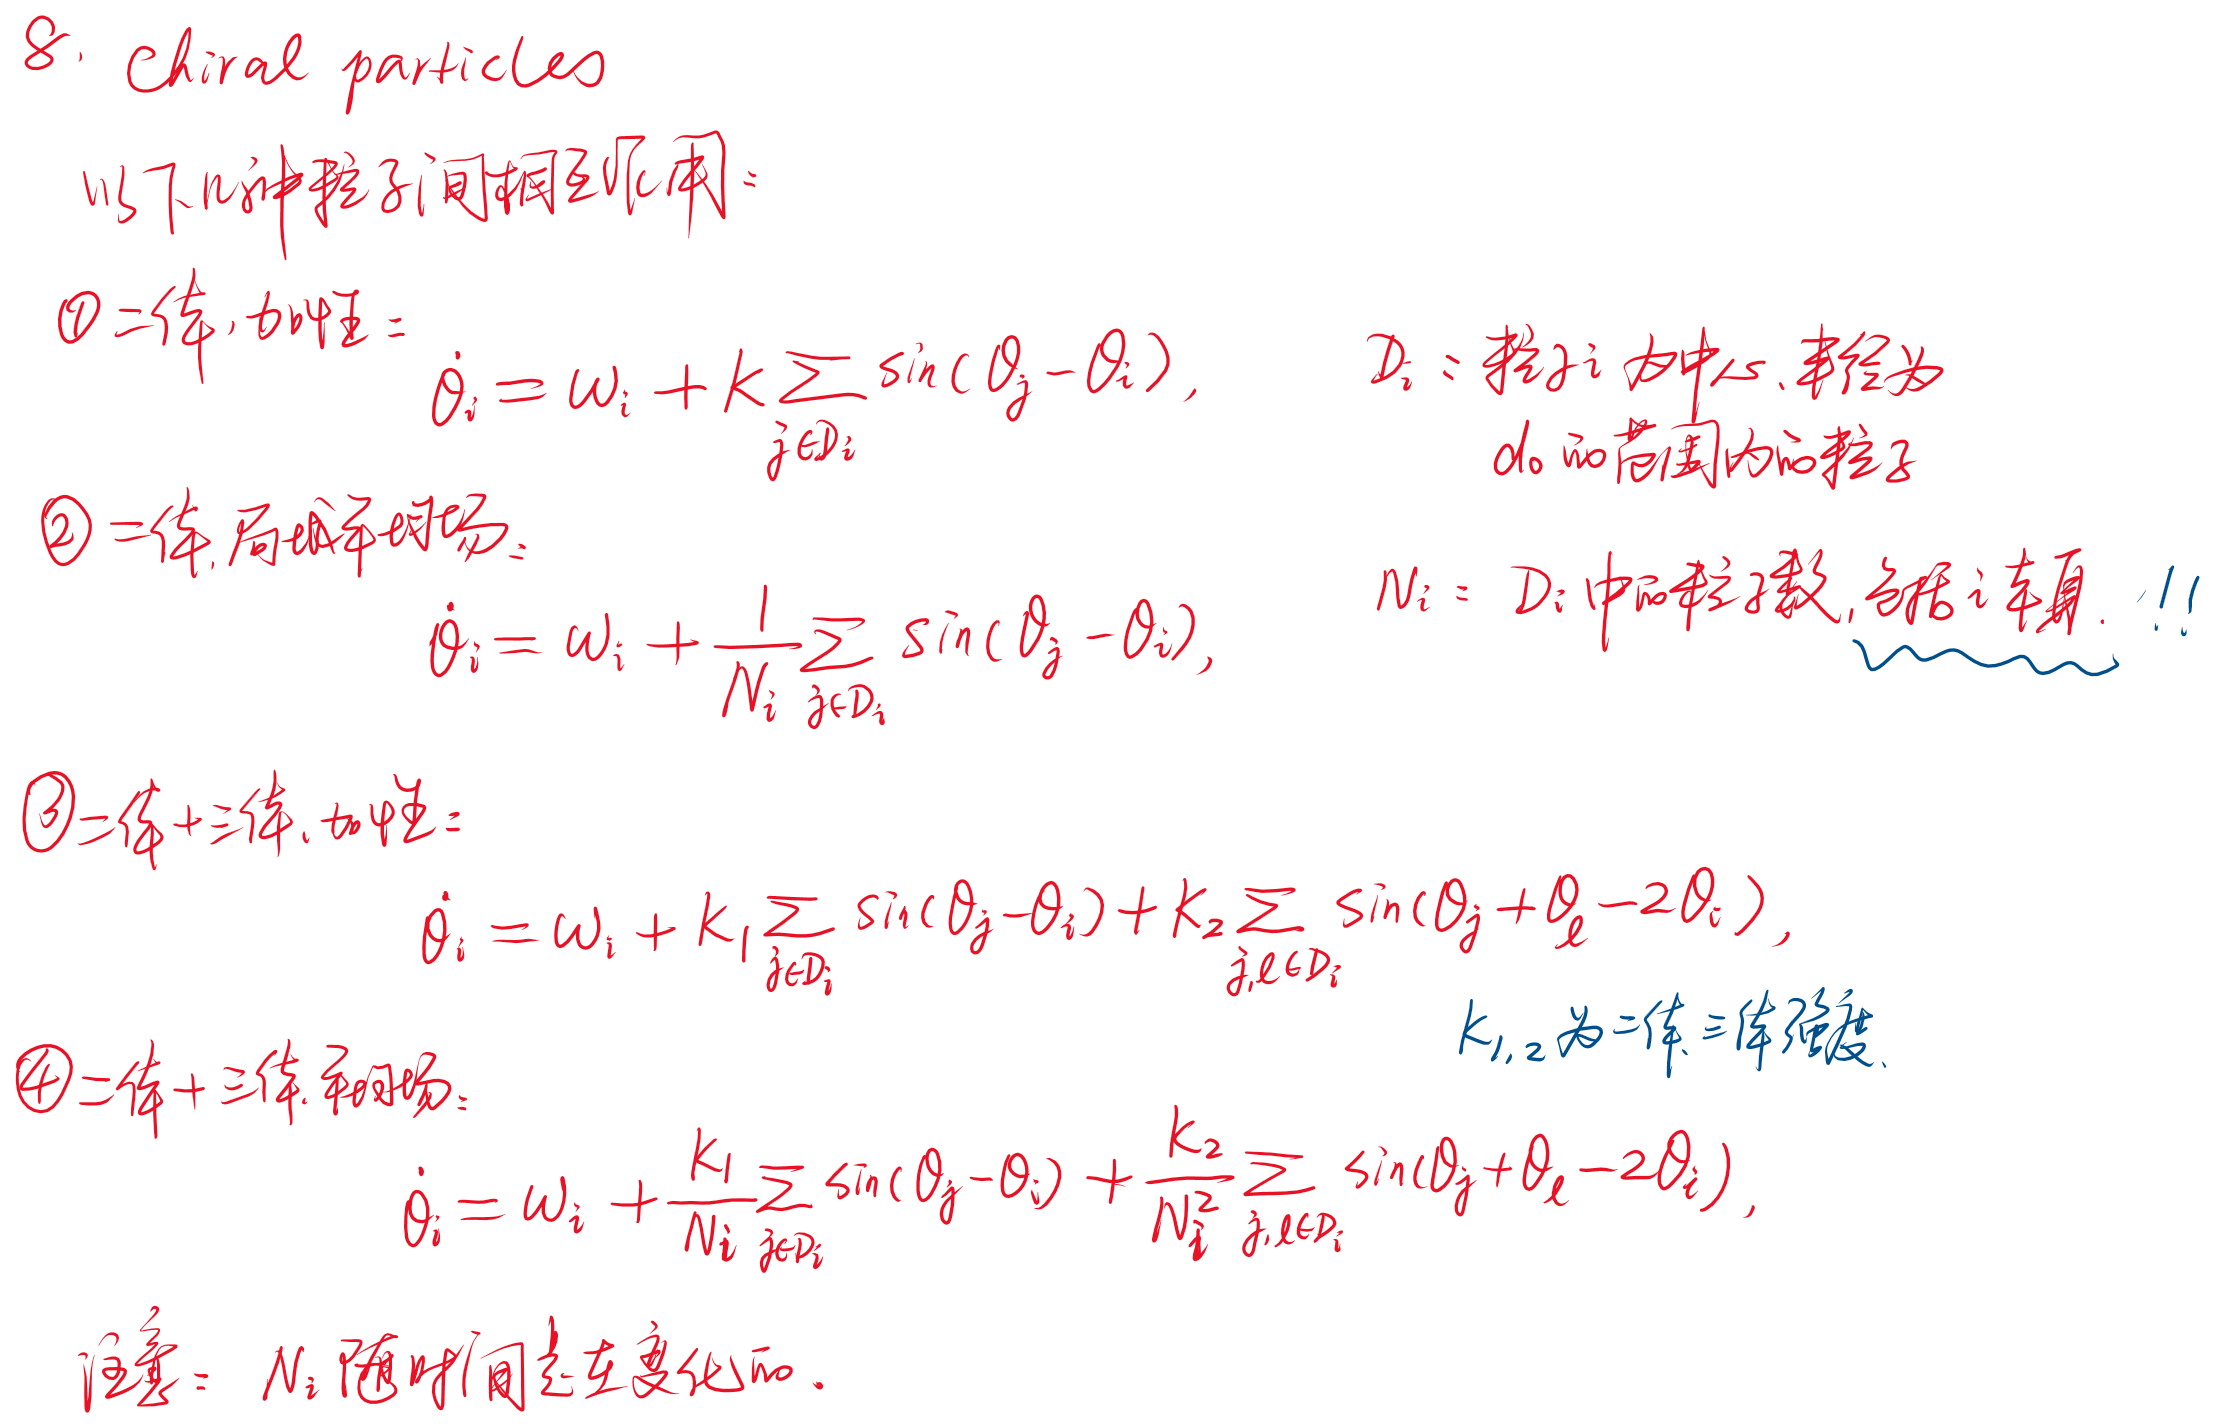

In [1]:
from main import *

In [2]:
model = ThreeBody(strengthLambda1=0.09, strengthLambda2=0.09, 
                  distanceD1=0.5, distanceD2=0.5, agentsNum=200, boundaryLength=5,
                  tqdm=True, savePath="", overWrite=True)
# model.tempForK = model.tempForK

In [3]:
model.update()

In [4]:
matK = model.distance_x(model.deltaX) <= model.distanceD2
(
    matK * 
    np.sin(model.phaseTheta[:, np.newaxis] - 
    model.phaseTheta)
).sum(axis=0)[:10]

array([-0.33921596, -0.63132359,  0.24844232,  2.51070002,  2.05253005,
       -2.06817795, -1.57143316,  0.68114203, -1.52296337,  2.9633316 ])

In [18]:
model.tempForK[:, 1].sum()

9

In [15]:
idxs = np.where(
    (
        model.tempForK[:, :, np.newaxis] * 
        model.tempForK[:, np.newaxis, :] * 
        model.tempForK[np.newaxis, :, :]
    )
)
phaseTheta = model.phaseTheta[:, np.newaxis, np.newaxis]
other1 = model.phaseTheta[np.newaxis, np.newaxis, :]
other2 = model.phaseTheta[np.newaxis, :, np.newaxis]
idxs

(array([  1,   1,   1, ..., 199, 199, 199], dtype=int64),
 array([ 70,  70,  70, ...,  83, 102, 102], dtype=int64),
 array([ 72,  86,  98, ..., 102,  45,  83], dtype=int64))

In [24]:
np.where(model.K2)

(array([  1,   1,   1, ..., 199, 199, 199], dtype=int64),
 array([ 70,  70,  70, ...,  83, 102, 102], dtype=int64),
 array([ 72,  86,  98, ..., 102,  45,  83], dtype=int64))

In [ ]:
(other1 + other2 + phaseTheta)[idxs]

In [59]:
for i in range(20):

    idx = np.random.choice(np.arange(len(idxs[0])))
    idxTuple = (idxs[0][idx], idxs[1][idx], idxs[2][idx])

    print(idx, 
        model.tempForK[idxs[0][idx], idxs[1][idx]] * 
        model.tempForK[idxs[0][idx], idxs[2][idx]] * 
        model.tempForK[idxs[1][idx], idxs[2][idx]],
    )
    if not (other1 + other2 - phaseTheta * 2)[idxTuple] == (
        model.phaseTheta[idxs[2][idx]] + 
        model.phaseTheta[idxs[1][idx]] -
        model.phaseTheta[idxs[0][idx]] * 2
    ):
        print(idxTuple, (other1 + other2 - phaseTheta * 2)[idxTuple],
            model.phaseTheta[idxs[2][idx]] + 
            model.phaseTheta[idxs[1][idx]] -
            model.phaseTheta[idxs[0][idx]] * 2
        )

2620 True
4411 True
1621 True
642 True
639 True
3818 True
3742 True
3453 True
4462 True
923 True
4548 True
2559 True
2954 True
1048 True
1625 True
1639 True
1330 True
4414 True
3656 True
2171 True


In [13]:
(
    model.tempForK[:, :, np.newaxis] * 
    model.tempForK[:, np.newaxis, :] * 
    model.tempForK[np.newaxis, :, :]
).sum(axis=(1, 2))

array([  0,  32,  10,  22,   4,   8,  28,  22,   6,  10,  34,   4,   8,
        18,  16,  16,   6,  54,  16,   0, 112,  22,  16,   8,  26,  44,
        12,   0,  28,   8,  62,  44,  54,  54,  14,  42,  16,  20,  20,
         4,  18,   2,  12,   2,  62,   6,  22,  24,  20,  40, 114,  34,
        16,  38,  38,  36,  24,  58,  12,   6,  18,  16,  38,   8,  30,
        20,   2,   4,  22,  26,  80,  94,  16,  18,  30,  22,  56,  14,
        62,   4,  14,  30,   8,  34,  18,   2,  60,  34,  36,   8,  42,
         2,  30,   8,  46,  10,  38,   6,  36,  44,  28,   4,   4,  26,
        46,  20,  10,  10,  28,   2,  10,  20,   6,   6,  20,  12,  18,
        34,   8,  54,   2,   4,  20,  44,  18,   2,   8,  16,  34,   6,
         8,   4,  20,  28,  14,   0,   0,  54,  14,  26,   6,   4,   8,
         0,  36,  14,  42,   2,  30,  70,  26,  16,  36,  26,  12,  16,
         0,  14,  46,  16,  14,  10,  30,   8,  10,  58,  28, 112,  18,
        52,  42,  56,  12,  28,  10,  80,  20,  16,  18,   2,  1

In [14]:
(
    model.K2 * 
    np.sin(
        model.phaseTheta[np.newaxis, np.newaxis, :] + 
        model.phaseTheta[np.newaxis, :, np.newaxis] - 
        model.phaseTheta[:, np.newaxis, np.newaxis]
    )
).sum(axis=(1, 2))[:10]

array([ 0.        ,  2.20890724,  1.68856879, -4.60725361, -1.30796471,
        5.98211595,  3.03771676, -4.26551207, -0.17002069, -2.87130397])

In [3]:
model.run(2000)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [4]:
import pandas as pd

def draw_mp4(model):

    targetPath = f"./data/{model}.h5"
    totalPositionX = pd.read_hdf(targetPath, key="positionX")
    totalPhaseTheta = pd.read_hdf(targetPath, key="phaseTheta")
    totalPointTheta = pd.read_hdf(targetPath, key="pointTheta")
    TNum = totalPositionX.shape[0] // model.agentsNum
    totalPositionX = totalPositionX.values.reshape(TNum, model.agentsNum, 2)
    totalPhaseTheta = totalPhaseTheta.values.reshape(TNum, model.agentsNum)
    totalPointTheta = totalPointTheta.values.reshape(TNum, model.agentsNum)
    shift = 0
    class1, class2 = (
        np.concatenate([np.ones(model.agentsNum // 2), np.zeros(model.agentsNum // 2)]).astype(bool), 
        np.concatenate([np.zeros(model.agentsNum // 2), np.ones(model.agentsNum // 2)]).astype(bool)
    )

    def plot_frame(i):
        pbar.update(1)
        positionX = totalPositionX[i]
        phaseTheta = totalPhaseTheta[i]
        fig.clear()
        ax1 = plt.subplot(1, 2, 1)
        ax1.quiver(
            positionX[class1, 0], positionX[class1, 1],
            np.cos(phaseTheta[class1]), np.sin(phaseTheta[class1]), color='tomato'
        )
        ax1.quiver(
            positionX[class2, 0], positionX[class2, 1],
            np.cos(phaseTheta[class2]), np.sin(phaseTheta[class2]), color='dodgerblue'
        )
        limShift = 0
        ax1.set_xlim(0 - limShift, 3 + limShift)
        ax1.set_ylim(0 - limShift, 3 + limShift)

        ax2 = plt.subplot(1, 2, 2, projection='3d')
        hist, bins = np.histogram(phaseTheta[class1], bins=100, range=(-np.pi, np.pi))
        # print(np.array([np.zeros_like(hist), hist]).shape)
        ax2.plot_surface(
            np.cos(bins[:-1]), np.sin(bins[:-1]), 
            np.array([np.zeros_like(hist), hist]), 
            color='tomato', alpha=0.5, edgecolor="tomato"
        )
        hist, bins = np.histogram(phaseTheta[class2], bins=100, range=(-np.pi, np.pi))
        ax2.plot_surface(
            np.cos(bins[:-1]) + shift, np.sin(bins[:-1]) + shift,
            np.array([np.zeros_like(hist), hist]), 
            color='dodgerblue', alpha=0.5, edgecolor="dodgerblue"
        )
        ax2.set_xlabel(r"$\cos(\theta_I)$")
        ax2.set_ylabel(r"$\sin(\theta_I)$")
        ax2.set_zlabel("Count")
        ax2.set_zlim(0, 1000)

    pbar = tqdm(total=TNum)
    fig, ax = plt.subplots(figsize=(11, 5))
    ani = ma.FuncAnimation(fig, plot_frame, frames=np.arange(0, TNum, 1), interval=50, repeat=False)
    ani.save(f"./mp4/{model}.mp4", dpi=200, writer="ffmpeg")

    plt.close()

    pbar.close()

In [5]:
draw_mp4(model)

  0%|          | 0/402 [00:00<?, ?it/s]